In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('foreveralone.csv')
df

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,5/17/2016 20:04:18,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None
1,5/17/2016 20:04:30,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,5/17/2016 20:04:58,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10.0,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,5/17/2016 20:08:01,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8.0,Yes,Yes,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym
4,5/17/2016 20:08:04,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10.0,No,Yes,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,6/2/2016 5:04:24,Female,Straight,26,"$10,000 to $19,999",White non-Hispanic,Overweight,Yes,No,Yes but I haven't,10.0,Yes,No,"Set me up with a date, date coaching",No,Employed for wages,Consultant IT,Master’s degree,Joined a gym/go to the gym
465,6/3/2016 19:25:46,Male,Straight,31,"$30,000 to $39,999",White non-Hispanic,Normal weight,No,No,Yes but I haven't,10.0,No,No,I don't want help,No,Employed for wages,castor,"High school graduate, diploma or the equivalen...","Other exercise, join clubs/socual clubs/meet ups"
466,6/6/2016 1:36:55,Female,Straight,17,"$1 to $10,000",Asian,Normal weight,Yes,No,No,20.0,Yes,Yes,wingman/wingwoman,Yes,Employed for wages,receptionist,"Some high school, no diploma","Joined a gym/go to the gym, Other exercise, jo..."
467,8/14/2016 15:10:41,Male,Straight,18,$0,Asian,Obese,Yes,No,No,16.0,Yes,Yes,Set me up with a date,No,Out of work but not currently looking for work,Student,"High school graduate, diploma or the equivalen...","Joined a gym/go to the gym, Therapy"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time                   469 non-null    object 
 1   gender                 469 non-null    object 
 2   sexuallity             469 non-null    object 
 3   age                    469 non-null    int64  
 4   income                 469 non-null    object 
 5   race                   469 non-null    object 
 6   bodyweight             469 non-null    object 
 7   virgin                 469 non-null    object 
 8   prostitution_legal     469 non-null    object 
 9   pay_for_sex            469 non-null    object 
 10  friends                469 non-null    float64
 11  social_fear            469 non-null    object 
 12  depressed              469 non-null    object 
 13  what_help_from_others  469 non-null    object 
 14  attempt_suicide        469 non-null    object 
 15  employ

In [4]:
df.describe()

,age,friends
count,469.000000,469.000000
mean,23.963753,7.956716
std,6.023526,34.371500
min,12.000000,0.000000
25%,20.000000,1.000000
50%,23.000000,3.000000
75%,26.000000,7.000000
max,70.000000,600.000000


In [5]:
df.columns

Index(['time', 'gender', 'sexuallity', 'age', 'income', 'race', 'bodyweight',
       'virgin', 'prostitution_legal', 'pay_for_sex', 'friends', 'social_fear',
       'depressed', 'what_help_from_others', 'attempt_suicide', 'employment',
       'job_title', 'edu_level', 'improve_yourself_how'],
      dtype='object')

## Feature Selection

According to case study we can consider some important featuers 

['gender', 'sexuallity', 'friends', 'age', 'income', 'bodyweight', 'virgin', 'social_fear', 'depressed']


target variable = 'attempt_suicide'

In [6]:
cols = ['gender', 'sexuallity', 'friends', 'age', 'income', 'bodyweight', 'virgin', 'social_fear', 'depressed', 'attempt_suicide']

In [7]:
for i in cols:
    print('-----------------------------------')
    print(i, ':')
    print(df[i].value_counts())
    #print('Unique Values :', df[i].unique())
    print('Number of Unique values:', len(df[i].unique()))
    print('\n')

-----------------------------------
gender :
Male                  393
Female                 73
Transgender male        2
Transgender female      1
Name: gender, dtype: int64
Number of Unique values: 4


-----------------------------------
sexuallity :
Straight       415
Bisexual        46
Gay/Lesbian      8
Name: sexuallity, dtype: int64
Number of Unique values: 3


-----------------------------------
friends :
0.0      109
1.0       54
5.0       45
3.0       44
2.0       42
10.0      34
4.0       27
6.0       26
20.0      16
15.0      12
7.0       10
8.0       10
12.0       8
30.0       6
16.0       3
40.0       3
13.0       3
9.0        2
100.0      2
17.0       2
25.0       2
600.0      1
400.0      1
11.0       1
28.0       1
60.0       1
80.0       1
0.5        1
18.0       1
0.2        1
Name: friends, dtype: int64
Number of Unique values: 30


-----------------------------------
age :
23    46
21    41
22    40
18    39
20    39
24    37
19    32
25    30
26    26
28    21
30 

In [8]:
df1 = df[cols]

In [9]:
df1

,gender,sexuallity,friends,age,income,bodyweight,virgin,social_fear,depressed,attempt_suicide
0,Male,Straight,0.0,35,"$30,000 to $39,999",Normal weight,Yes,Yes,Yes,Yes
1,Male,Bisexual,0.0,21,"$1 to $10,000",Underweight,Yes,Yes,Yes,No
2,Male,Straight,10.0,22,$0,Overweight,Yes,Yes,Yes,No
3,Male,Straight,8.0,19,"$1 to $10,000",Overweight,Yes,Yes,Yes,No
4,Male,Straight,10.0,23,"$30,000 to $39,999",Overweight,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...
464,Female,Straight,10.0,26,"$10,000 to $19,999",Overweight,Yes,Yes,No,No
465,Male,Straight,10.0,31,"$30,000 to $39,999",Normal weight,No,No,No,No
466,Female,Straight,20.0,17,"$1 to $10,000",Normal weight,Yes,Yes,Yes,Yes
467,Male,Straight,16.0,18,$0,Obese,Yes,Yes,Yes,No


In [10]:
df1.isna().sum()

gender             0
sexuallity         0
friends            0
age                0
income             0
bodyweight         0
virgin             0
social_fear        0
depressed          0
attempt_suicide    0
dtype: int64

In [11]:
cat_cols = ['gender', 'sexuallity', 'bodyweight', 'virgin', 'social_fear', 'depressed', 'attempt_suicide']

In [12]:
for i in cat_cols:
    print('-----------------------------------')
    print(i, ':')
    print(df1[i].value_counts())
    #print('Unique Values :', df[i].unique())
    print('Number of Unique values:', len(df[i].unique()))
    print('\n')

-----------------------------------
gender :
Male                  393
Female                 73
Transgender male        2
Transgender female      1
Name: gender, dtype: int64
Number of Unique values: 4


-----------------------------------
sexuallity :
Straight       415
Bisexual        46
Gay/Lesbian      8
Name: sexuallity, dtype: int64
Number of Unique values: 3


-----------------------------------
bodyweight :
Normal weight    269
Overweight       113
Underweight       62
Obese             25
Name: bodyweight, dtype: int64
Number of Unique values: 4


-----------------------------------
virgin :
Yes    352
No     117
Name: virgin, dtype: int64
Number of Unique values: 2


-----------------------------------
social_fear :
Yes    308
No     161
Name: social_fear, dtype: int64
Number of Unique values: 2


-----------------------------------
depressed :
Yes    312
No     157
Name: depressed, dtype: int64
Number of Unique values: 2


-----------------------------------
attempt_suicide

In [13]:
df1['gender'].replace('Transgender male', 'Male', inplace=True)

df1['gender'].replace('Transgender female', 'Female', inplace=True)

c:\users\agraw\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [14]:
df1.nunique()

gender              2
sexuallity          3
friends            30
age                35
income             13
bodyweight          4
virgin              2
social_fear         2
depressed           2
attempt_suicide     2
dtype: int64

In [15]:
df1

,gender,sexuallity,friends,age,income,bodyweight,virgin,social_fear,depressed,attempt_suicide
0,Male,Straight,0.0,35,"$30,000 to $39,999",Normal weight,Yes,Yes,Yes,Yes
1,Male,Bisexual,0.0,21,"$1 to $10,000",Underweight,Yes,Yes,Yes,No
2,Male,Straight,10.0,22,$0,Overweight,Yes,Yes,Yes,No
3,Male,Straight,8.0,19,"$1 to $10,000",Overweight,Yes,Yes,Yes,No
4,Male,Straight,10.0,23,"$30,000 to $39,999",Overweight,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...
464,Female,Straight,10.0,26,"$10,000 to $19,999",Overweight,Yes,Yes,No,No
465,Male,Straight,10.0,31,"$30,000 to $39,999",Normal weight,No,No,No,No
466,Female,Straight,20.0,17,"$1 to $10,000",Normal weight,Yes,Yes,Yes,Yes
467,Male,Straight,16.0,18,$0,Obese,Yes,Yes,Yes,No


In [16]:
df1['income']

0      $30,000 to $39,999
1           $1 to $10,000
2                      $0
3           $1 to $10,000
4      $30,000 to $39,999
              ...        
464    $10,000 to $19,999
465    $30,000 to $39,999
466         $1 to $10,000
467                    $0
468    $40,000 to $49,999
Name: income, Length: 469, dtype: object

In [17]:
df1['income'] = df1['income'].apply([lambda x : x.replace('$', '')])
df1['income'] = df1['income'].apply([lambda x : x.replace('to', '+')])
df1['income'] = df1['income'].apply([lambda x : x.replace(',', '')])
df1['income'] = df1['income'].apply([lambda x : x.replace('or more', '+ 0')])

<ipython-input-17-fe0b2a01ed90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['income'] = df1['income'].apply([lambda x : x.replace('$', '')])
<ipython-input-17-fe0b2a01ed90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['income'] = df1['income'].apply([lambda x : x.replace('to', '+')])
<ipython-input-17-fe0b2a01ed90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [18]:
df1['income'] = df1['income'].apply(lambda x : eval(x))

<ipython-input-18-32cfd3ae591e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['income'] = df1['income'].apply(lambda x : eval(x))


In [19]:
df1['income'].astype('int32')

0      69999
1      10001
2          0
3      10001
4      69999
       ...  
464    29999
465    69999
466    10001
467        0
468    89999
Name: income, Length: 469, dtype: int32

In [20]:
df1['income'].value_counts()

0         160
10001     100
29999      58
49999      44
69999      39
124999     28
89999      16
174999      9
274999      6
224999      3
324999      2
200000      2
374998      2
Name: income, dtype: int64

In [21]:
df1

,gender,sexuallity,friends,age,income,bodyweight,virgin,social_fear,depressed,attempt_suicide
0,Male,Straight,0.0,35,69999,Normal weight,Yes,Yes,Yes,Yes
1,Male,Bisexual,0.0,21,10001,Underweight,Yes,Yes,Yes,No
2,Male,Straight,10.0,22,0,Overweight,Yes,Yes,Yes,No
3,Male,Straight,8.0,19,10001,Overweight,Yes,Yes,Yes,No
4,Male,Straight,10.0,23,69999,Overweight,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...
464,Female,Straight,10.0,26,29999,Overweight,Yes,Yes,No,No
465,Male,Straight,10.0,31,69999,Normal weight,No,No,No,No
466,Female,Straight,20.0,17,10001,Normal weight,Yes,Yes,Yes,Yes
467,Male,Straight,16.0,18,0,Obese,Yes,Yes,Yes,No


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           469 non-null    object 
 1   sexuallity       469 non-null    object 
 2   friends          469 non-null    float64
 3   age              469 non-null    int64  
 4   income           469 non-null    int64  
 5   bodyweight       469 non-null    object 
 6   virgin           469 non-null    object 
 7   social_fear      469 non-null    object 
 8   depressed        469 non-null    object 
 9   attempt_suicide  469 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 23.9+ KB


In [23]:
df1.columns

Index(['gender', 'sexuallity', 'friends', 'age', 'income', 'bodyweight',
       'virgin', 'social_fear', 'depressed', 'attempt_suicide'],
      dtype='object')

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           469 non-null    object 
 1   sexuallity       469 non-null    object 
 2   friends          469 non-null    float64
 3   age              469 non-null    int64  
 4   income           469 non-null    int64  
 5   bodyweight       469 non-null    object 
 6   virgin           469 non-null    object 
 7   social_fear      469 non-null    object 
 8   depressed        469 non-null    object 
 9   attempt_suicide  469 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 23.9+ KB


In [25]:
df1.describe()

,friends,age,income
count,469.000000,469.000000,469.000000
mean,7.956716,23.963753,39040.279318
std,34.371500,6.023526,59723.247442
min,0.000000,12.000000,0.000000
25%,1.000000,20.000000,0.000000
50%,3.000000,23.000000,10001.000000
75%,7.000000,26.000000,49999.000000
max,600.000000,70.000000,374998.000000


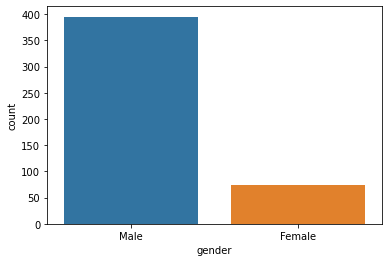

In [26]:
sns.countplot(df1['gender'])

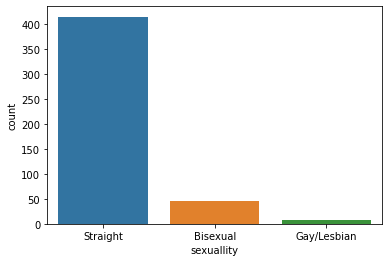

In [27]:
sns.countplot(df1['sexuallity'])

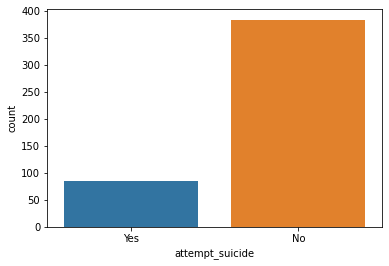

In [28]:
sns.countplot(df1['attempt_suicide'])

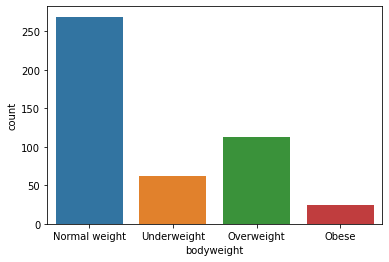

In [29]:
sns.countplot(df1['bodyweight'])

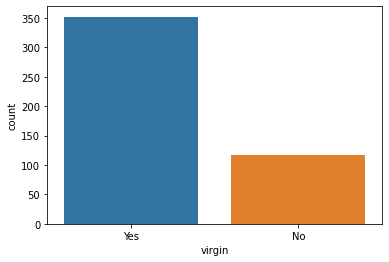

In [30]:
sns.countplot(df1['virgin'])

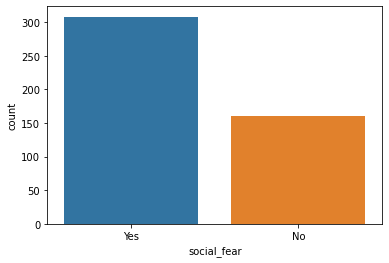

In [31]:
sns.countplot(df1['social_fear'])

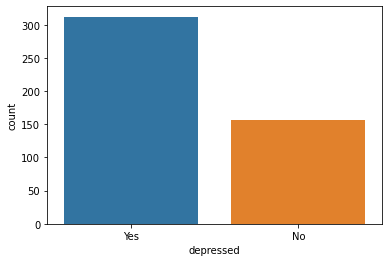

In [32]:
sns.countplot(df1['depressed'])

In [33]:
df1.corr()

,friends,age,income
friends,1.000000,0.050807,0.120732
age,0.050807,1.000000,0.422088
income,0.120732,0.422088,1.000000


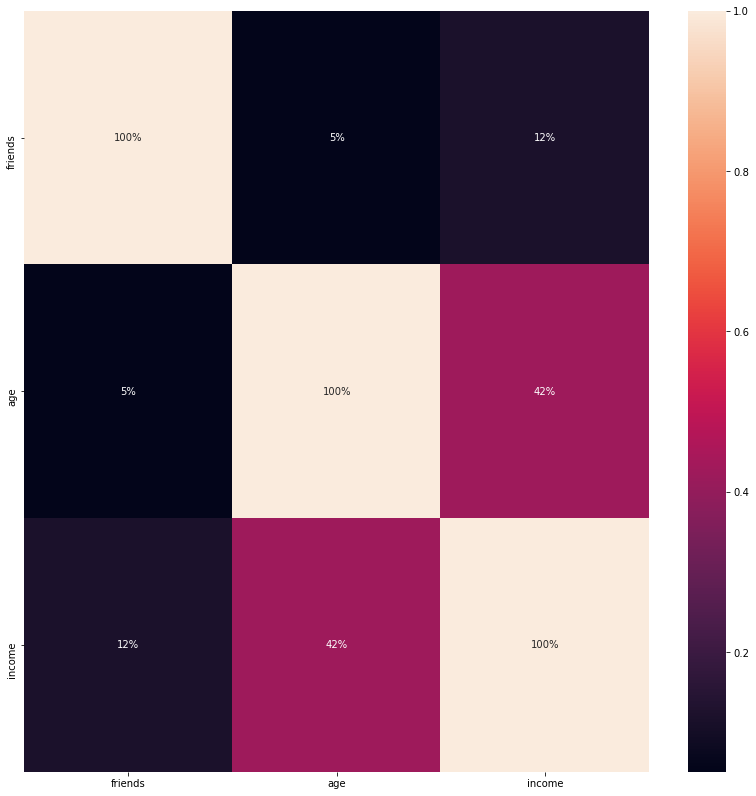

In [34]:
plt.figure(figsize=(14,14))
sns.heatmap(df1.corr(), annot=True, fmt='.0%')

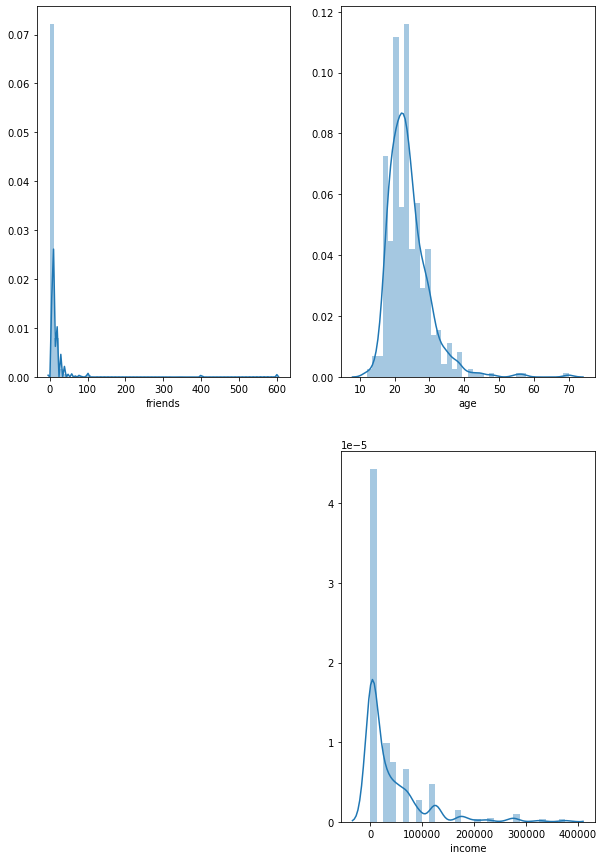

In [71]:
plotnumber =1
plt.figure(figsize=(10,15))

for col in ['friends', 'age', 'income']:
    plt.subplot(2,2, plotnumber)
    if plotnumber <=8:
        sns.distplot(df1[col])
    plotnumber += plotnumber


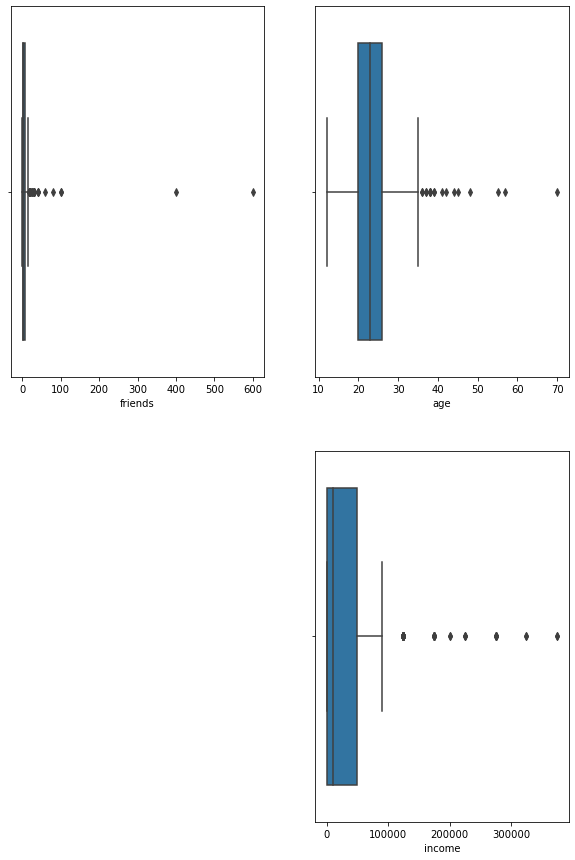

In [72]:
plotnumber =1
plt.figure(figsize=(10,15))

for col in ['friends', 'age', 'income']:
    plt.subplot(2,2, plotnumber)
    if plotnumber <=8:
        sns.boxplot(df1[col])
    plotnumber += plotnumber

In [ ]:
df1

In [41]:
from sklearn.preprocessing import LabelEncoder

for column in df1.columns:
    if df1[column].dtype == 'object':
        df1[column] = LabelEncoder().fit_transform(df1[column])

<ipython-input-41-4e0313ab77df>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column] = LabelEncoder().fit_transform(df1[column])


In [43]:
final_df = df1

In [44]:
final_df

,gender,sexuallity,friends,age,income,bodyweight,virgin,social_fear,depressed,attempt_suicide
0,1,2,0.0,35,69999,0,1,1,1,1
1,1,0,0.0,21,10001,3,1,1,1,0
2,1,2,10.0,22,0,2,1,1,1,0
3,1,2,8.0,19,10001,2,1,1,1,0
4,1,2,10.0,23,69999,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
464,0,2,10.0,26,29999,2,1,1,0,0
465,1,2,10.0,31,69999,0,0,0,0,0
466,0,2,20.0,17,10001,0,1,1,1,1
467,1,2,16.0,18,0,1,1,1,1,0


In [45]:
X = final_df.drop('attempt_suicide', axis=1)
y = final_df['attempt_suicide']

In [46]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=92)

In [47]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [48]:
model.fit(X_train, y_train)

LogisticRegression()

In [49]:
model.score(X_train, y_train)

0.8170731707317073

In [50]:
model.score(X_test, y_test)

0.8226950354609929

In [51]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

In [52]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
tree.score(X_train, y_train)

0.9969512195121951

In [54]:
tree.score(X_test, y_test)

0.7872340425531915

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [56]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
tree.score(X_train, y_train)

0.9969512195121951

In [58]:
tree.score(X_test, y_test)

0.7872340425531915

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


In [60]:
from sklearn.metrics import classification_report

print('Confustion Matrix : \n\n', confusion_matrix(y_test,  rf.predict(X_test)))
print('\n Accuracy Score : ',   accuracy_score(y_test,  rf.predict(X_test)))
print('\n Classification Report : \n \n',classification_report(y_test, rf.predict(X_test)))

Confustion Matrix : 

 [[112   4]
 [ 19   6]]

 Accuracy Score :  0.8368794326241135

 Classification Report : 
 
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       116
           1       0.60      0.24      0.34        25

    accuracy                           0.84       141
   macro avg       0.73      0.60      0.62       141
weighted avg       0.81      0.84      0.81       141



In [61]:
final_df.tail(4)

,gender,sexuallity,friends,age,income,bodyweight,virgin,social_fear,depressed,attempt_suicide
465,1,2,10.0,31,69999,0,0,0,0,0
466,0,2,20.0,17,10001,0,1,1,1,1
467,1,2,16.0,18,0,1,1,1,1,0
468,1,2,3.0,28,89999,0,1,1,1,0


In [62]:
rf.predict([[1, 2, 20, 17, 0, 1, 1, 1, 1]])

array([0])

In [63]:
final_df[final_df['attempt_suicide'] == 1]

,gender,sexuallity,friends,age,income,bodyweight,virgin,social_fear,depressed,attempt_suicide
0,1,2,0.0,35,69999,0,1,1,1,1
5,1,2,2.0,24,124999,0,1,1,1,1
7,0,1,10.0,24,49999,0,1,1,1,1
9,1,2,6.0,33,124999,2,0,1,1,1
11,1,2,0.0,25,10001,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
445,0,0,3.0,20,10001,0,1,1,1,1
449,1,2,5.0,27,10001,2,1,0,1,1
461,1,2,5.0,18,10001,2,1,1,1,1
463,1,0,0.5,12,0,1,0,1,0,1


In [64]:
rf.predict([[1, 2, 0, 35, 69999, 0, 1, 1, 1]])

array([0])